In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

**Importing the dataset**

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data = pd.get_dummies(data,drop_first=True)

In [6]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [7]:
features = [feat for feat in data.columns if feat!= "Purchased" and feat!='User ID']

In [8]:
X = data[features]
Y = data.Purchased

In [9]:
X.head()

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [10]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=300)

In [12]:
x_test.shape

(80, 3)

In [13]:
x_train.shape

(320, 3)

**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train = pd.DataFrame(scl.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(scl.fit_transform(x_test),columns=x_test.columns)

In [16]:
x_test.head()

,Age,EstimatedSalary,Gender_Male
0,-1.555317,0.622558,0.951190
1,-1.355115,0.438890,-1.051315
2,0.947204,-0.816175,-1.051315
3,0.146398,0.102165,0.951190
4,0.246498,-0.785564,0.951190


In [17]:
x_train.head()

,Age,EstimatedSalary,Gender_Male
0,-0.277669,-0.269473,1.038230
1,-0.656175,-0.356752,1.038230
2,-1.223933,0.486943,1.038230
3,-0.561548,1.447011,1.038230
4,-0.561548,1.359732,-0.963177


**Fitting K-NN to the Training set**

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
KNC = KNeighborsClassifier()

In [20]:
KNC.fit(x_train,y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [21]:
y_pred = KNC.predict(x_test)

**Making the Confusion Matrix**

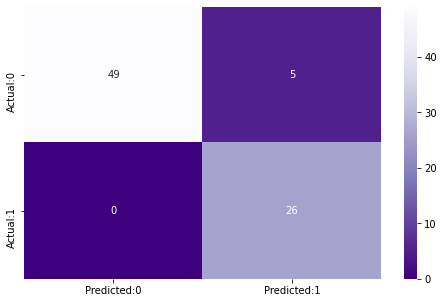







--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.84      1.00      0.91        26

    accuracy                           0.94        80
   macro avg       0.92      0.95      0.93        80
weighted avg       0.95      0.94      0.94        80



In [26]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap ='Purples_r' )
plt.show()
print('\n')
print('\n')
print('\n')
print('-'*80)
report = classification_report(y_test,y_pred)
print(report)